# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[67, 51, 58, ..., 85, 91, 51],
       [31, 95, 98, ..., 16, 95, 52],
       [16, 72, 66, ..., 91, 97, 40],
       ...,
       [78, 30,  9, ..., 77, 31, 49],
       [75, 43, 46, ..., 55, 85, 82],
       [17, 38, 47, ..., 47, 81, 47]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [2]:
A[:, np.random.permutation(A.shape[1])]

array([[51, 46, 18, ..., 20, 36, 57],
       [95, 82,  3, ..., 40, 73, 69],
       [72,  4, 60, ..., 51, 23, 61],
       ...,
       [30,  8, 70, ..., 67, 74, 70],
       [43,  2, 97, ..., 16, 46, 22],
       [38, 93, 64, ...,  6, 87, 23]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [3]:
row_idxs = np.where(np.sum(A[:, ::2], axis=1) > np.mean(A[:, 1::2].sum(axis=1)), 1, 0)
A[np.where(row_idxs)[0]]

array([[31, 95, 98, ..., 16, 95, 52],
       [80, 30,  5, ...,  2, 80, 98],
       [50, 48, 31, ..., 48, 30, 29],
       ...,
       [78, 30,  9, ..., 77, 31, 49],
       [75, 43, 46, ..., 55, 85, 82],
       [17, 38, 47, ..., 47, 81, 47]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [4]:
max_along_rows = np.amax(A, axis=1)
min_along_rows = np.amin(A, axis=1)
max_diff_row_idx = np.argmax(max_along_rows - min_along_rows)
max_diff_row_idx

0

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [5]:
A.argsort(axis=None).argsort().reshape(A.shape) + 1

array([[6742, 5187, 5834, ..., 8581, 9159, 5195],
       [3137, 9500, 9775, ..., 1580, 9573, 5292],
       [1564, 7233, 6638, ..., 9176, 9751, 3993],
       ...,
       [7800, 3022,  912, ..., 7702, 3154, 4883],
       [7551, 4313, 4689, ..., 5500, 8582, 8270],
       [1668, 3817, 4760, ..., 4747, 8138, 4727]], dtype=int64)

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [6]:
A_zeroed = A - A.min(axis=1)[:, None]
A_5 = A_zeroed / (A.max(axis=1) - A.min(axis=1))[:, None]
A_5

array([[0.67676768, 0.51515152, 0.58585859, ..., 0.85858586, 0.91919192,
        0.51515152],
       [0.29896907, 0.95876289, 0.98969072, ..., 0.1443299 , 0.95876289,
        0.51546392],
       [0.13829787, 0.73404255, 0.67021277, ..., 0.93617021, 1.        ,
        0.39361702],
       ...,
       [0.81609195, 0.26436782, 0.02298851, ..., 0.8045977 , 0.27586207,
        0.48275862],
       [0.77319588, 0.44329897, 0.4742268 , ..., 0.56701031, 0.87628866,
        0.84536082],
       [0.11827957, 0.34408602, 0.44086022, ..., 0.44086022, 0.80645161,
        0.44086022]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [7]:
print((A * np.arange(1, 11).reshape(10, 1, 1)).shape)
A * np.arange(1, 11).reshape(10, 1, 1)

(10, 200, 50)


array([[[ 67,  51,  58, ...,  85,  91,  51],
        [ 31,  95,  98, ...,  16,  95,  52],
        [ 16,  72,  66, ...,  91,  97,  40],
        ...,
        [ 78,  30,   9, ...,  77,  31,  49],
        [ 75,  43,  46, ...,  55,  85,  82],
        [ 17,  38,  47, ...,  47,  81,  47]],

       [[134, 102, 116, ..., 170, 182, 102],
        [ 62, 190, 196, ...,  32, 190, 104],
        [ 32, 144, 132, ..., 182, 194,  80],
        ...,
        [156,  60,  18, ..., 154,  62,  98],
        [150,  86,  92, ..., 110, 170, 164],
        [ 34,  76,  94, ...,  94, 162,  94]],

       [[201, 153, 174, ..., 255, 273, 153],
        [ 93, 285, 294, ...,  48, 285, 156],
        [ 48, 216, 198, ..., 273, 291, 120],
        ...,
        [234,  90,  27, ..., 231,  93, 147],
        [225, 129, 138, ..., 165, 255, 246],
        [ 51, 114, 141, ..., 141, 243, 141]],

       ...,

       [[536, 408, 464, ..., 680, 728, 408],
        [248, 760, 784, ..., 128, 760, 416],
        [128, 576, 528, ..., 728, 776, 320

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [8]:
np.concatenate((A[:, ::2], A[:, 1::2]), axis=1)

array([[67, 58, 13, ..., 58, 85, 51],
       [31, 98, 55, ..., 32, 16, 52],
       [16, 66,  8, ..., 51, 91, 40],
       ...,
       [78,  9, 30, ..., 91, 77, 49],
       [75, 46, 65, ..., 61, 55, 82],
       [17, 47, 52, ..., 37, 47, 47]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [9]:
np.all(A > 5, axis=1).sum()

13

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который состоит из средних этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [10]:
A_splitted = np.asarray(np.split(A, 10))
A_9 = np.mean(A_splitted, axis=0)
print(A_9.shape)
A_9

(20, 50)


array([[54.2, 45.7, 45.5, 53.5, 43. , 39. , 49.5, 50.1, 25.6, 48.2, 35.2,
        45.8, 48. , 41.5, 50.9, 72.5, 37.8, 50. , 46. , 38.9, 63.4, 54.4,
        55.5, 43.2, 35.9, 52.7, 53.1, 54.3, 38.6, 44.5, 44.5, 36.4, 48.8,
        43.6, 61. , 61. , 33.4, 49.4, 63.9, 53.3, 48.1, 35.1, 49.9, 40.3,
        47. , 55.8, 47.3, 44.1, 38.4, 59. ],
       [43.6, 55.2, 58.4, 48. , 58.1, 39.3, 55.9, 29.1, 50.9, 64.3, 48. ,
        43. , 45.3, 53.9, 52. , 63.3, 47.7, 48.9, 52.7, 56.9, 62.6, 52.6,
        75.3, 50.4, 51.7, 42.6, 43.7, 46.3, 43.1, 63.3, 53.8, 52.3, 41.5,
        46.7, 58.3, 47.9, 43.8, 56.5, 42.3, 41.5, 39.5, 53.7, 52.2, 39.3,
        57. , 46.4, 50.9, 46.2, 59.2, 65.3],
       [47.2, 66.2, 51.5, 51.8, 40.9, 64.1, 47. , 61.6, 49.4, 34.9, 59. ,
        37.9, 70.2, 50.3, 62.1, 50.5, 51. , 48.9, 61.2, 32. , 39.7, 47.9,
        79.6, 56.7, 54.2, 53.3, 36.7, 61.3, 57.4, 53.5, 51.8, 58.9, 50. ,
        45.3, 49.9, 58.4, 54.1, 47.1, 49.5, 58.5, 40. , 57.9, 47.9, 40.4,
        39.5, 49.6, 50

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [11]:
unique_idxs = np.unique(A.ravel(), return_index=True)[1]
A.ravel()[np.sort(unique_idxs)]

array([67, 51, 58, 86, 13, 64, 94, 80, 41, 79,  1, 46, 22, 57, 74, 12, 30,
       63, 52, 83, 20, 33, 43, 60, 23, 36,  2, 19, 14, 99, 45, 18,  0, 49,
       85, 91, 31, 95, 98, 76, 55, 62, 40, 32, 82, 90, 69, 87,  3, 10,  6,
        7, 84,  9, 73, 59, 53, 70, 16, 72, 66,  8, 39, 44,  4, 61, 38, 21,
       47, 75, 42, 78, 26, 71, 97,  5, 35, 88, 27, 28, 17, 77, 56, 50, 92,
       93, 68, 24, 48, 89, 34, 96, 54, 29, 11, 15, 81, 25, 65, 37])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [12]:
mean_row = np.mean(A, axis=0)
np.linalg.norm(A - mean_row, axis=1)

array([193.02266823, 214.98753557, 180.44957869, 205.87734322,
       209.95856841, 207.87703204, 212.1504194 , 222.47730322,
       217.48581666, 192.26122971, 186.9819522 , 218.53297337,
       219.00132522, 204.65891246, 187.39527862, 198.70777652,
       209.50288888, 208.88125921, 182.53870946, 201.68091246,
       196.04527653, 206.05581877, 213.94625599, 206.74685112,
       181.45291524, 220.02484053, 213.1130931 , 206.42909303,
       224.44148558, 162.6904129 , 221.53207544, 194.21287406,
       212.67696267, 206.57272436, 213.67037804, 216.08054158,
       186.61760488, 192.72057609, 211.53645182, 183.57685162,
       174.21412242, 203.82769795, 230.2928363 , 201.87724104,
       189.0011123 , 225.08776166, 212.30605373, 195.81386685,
       203.60358654, 200.03729765, 205.54515428, 188.68110782,
       198.893993  , 196.75073176, 203.81940646, 193.33659884,
       191.24398147, 208.99067072, 202.40921533, 171.91143199,
       204.32824193, 194.67955838, 208.67228002, 189.15

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [13]:
np.where(A < 50, A * 2, A * 3)

array([[201, 153, 174, ..., 255, 273, 153],
       [ 62, 285, 294, ...,  32, 285, 156],
       [ 32, 216, 198, ..., 273, 291,  80],
       ...,
       [234,  60,  18, ..., 231,  62,  98],
       [225,  86,  92, ..., 165, 255, 246],
       [ 34,  76,  94, ...,  94, 243,  94]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [14]:
slide_3 = np.convolve(A.ravel(), np.ones(3), mode='valid') / 3
slide_5 = np.convolve(A.ravel(), np.ones(5), mode='valid') / 5
slide_10 = np.convolve(A.ravel(), np.ones(10), mode='valid') / 10

pad_slide_5 = np.pad(slide_5, pad_width=(0, slide_3.shape[0] - slide_5.shape[0]))
pad_slide_10 = np.pad(slide_10, pad_width=(0, slide_3.shape[0] - slide_10.shape[0]))

sum_of_windowed_arrays = slide_3 + pad_slide_5 + pad_slide_10
print(sum_of_windowed_arrays.shape)
sum_of_windowed_arrays

(9998,)


array([176.96666667, 176.1       , 171.53333333, ...,  98.66666667,
        60.33333333,  58.33333333])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

In [15]:
from scipy.optimize import minimize

def f(x):
    return (5*np.sin(2*x) - np.cos(x)**2 - 1 + np.abs(x**3) - x**2) / (x**2 + 1)

def d_f(f, x):
    dx = 1e-5
    return (f(x + dx) - f(x - dx)) / (2 * dx)

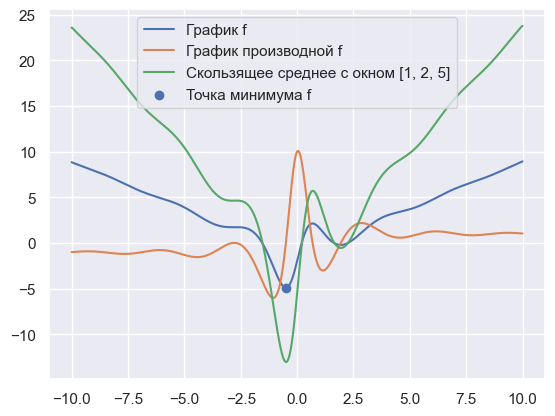

In [16]:
x = np.linspace(-10, 10, 1000)
y = f(x)
d_y = d_f(f, x)
x_min = minimize(f, x0=0).x
sliding_mean = np.convolve(y, np.array([1, 2, 5]), mode='valid') / 3
sliding_mean = np.pad(sliding_mean, (1, 1), mode='edge')

plt.plot(x, y, label='График f')
plt.plot(x, d_y, label='График производной f')
plt.plot(x, sliding_mean, label='Скользящее среднее с окном [1, 2, 5]')
plt.scatter(x_min, f(x_min), label='Точка минимума f')
plt.legend()
plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [17]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res
            
sample([50, 3, 1, 7, 20], 5)   

[0, 0, 0, 0, 4]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [18]:
def sample_np(x: np.ndarray, c: int) -> np.ndarray:
    assert len(x) > 0
    
    s = np.sum(x)
    val = s * np.random.random(size=c)
    idx = np.searchsorted(np.cumsum(x), val)
    return idx

sample_np(np.array([50, 3, 1, 7, 20]), 5)

array([0, 0, 4, 0, 0], dtype=int64)

In [19]:
from scipy import stats

sample1 = sample([50, 3, 1, 7, 20], 1000)
sample2 = sample_np(np.array([50, 3, 1, 7, 20]), 1000)
stats.ks_2samp(sample1, sample2)

KstestResult(statistic=0.043, pvalue=0.3136800387320582)

P-value для теста Колмогорова-Смирнова, в котором $H_0$: оба массива получены из одного распределения, равен $0.31$, а значит нулевая гипотеза принимается и мы можем утверждать, что семплы получены из одного распределения.

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [20]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

2310

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном запусков. 

In [21]:
def walk_np(n: int):
    return np.random.choice([-3, -1, 0, 2, 3], size=n).sum()

walk_np(10_000)

1559

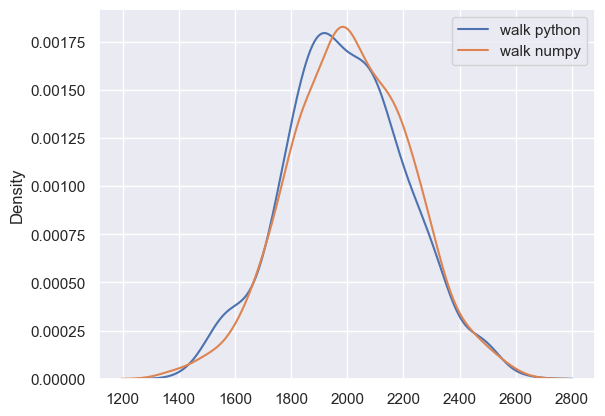

In [22]:
walk_array = [walk(10000) for i in range(800)]
walk_np_array = [walk_np(10000) for i in range(800)]

sns.kdeplot(walk_array, label='walk python')
sns.kdeplot(walk_np_array, label='walk numpy')
plt.legend()
plt.show()

In [23]:
%timeit -r 20 walk(10000)
%timeit -r 20 walk_np(10000)

13.8 ms ± 6.23 ms per loop (mean ± std. dev. of 20 runs, 100 loops each)
377 µs ± 99.4 µs per loop (mean ± std. dev. of 20 runs, 1000 loops each)


# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [24]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)

0.7426936462535454

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [25]:
import numba as nb

@nb.njit()
def strange_conv_nb(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

In [26]:
strange_conv_nb(a)

0.7426936462535454

In [27]:
%load_ext Cython

In [28]:
%%cython

cimport cython
cimport numpy as np
np.import_array()

ctypedef np.float64_t DTYPE_f

@cython.boundscheck(False)
@cython.wraparound(False) 
def strange_conv_c(DTYPE_f[:, :] a):
    cdef Py_ssize_t x = a.shape[0]
    cdef Py_ssize_t y = a.shape[1]

    cdef DTYPE_f t = 1.
    cdef DTYPE_f c
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c
            
    return t

In [29]:
strange_conv_c(a)

0.7426936462535454

In [30]:
import taichi as ti

ti.init(arch=ti.cpu)

@ti.kernel
def strange_conv_ti(a: ti.types.ndarray()) -> ti.f64:
    x = ti.u16(a.shape[0])
    y = ti.u16(a.shape[1])

    t = ti.f64(1.) 
    
    for y in ti.ndrange(y - 5):
        for x in ti.ndrange(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

[Taichi] version 1.3.0, llvm 15.0.1, commit 0f25b95e, win, python 3.9.13
[Taichi] Starting on arch=x64


In [31]:
strange_conv_ti(a)

1.029887860174978

In [32]:
%timeit strange_conv(a)
%timeit strange_conv_nb(a)
%timeit strange_conv_c(a)
%timeit strange_conv_ti(a)

32.7 s ± 474 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
52.2 ms ± 323 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
51.5 ms ± 22.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
515 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
